## Regularization

We would like to restrict the space of least-square solutions $\vec \theta$, which minimize the least-squares loss function

$$ \large L_\text{LS}(\vec \theta) = \| \vec y - \Phi \vec \theta \|^2_2,$$

where $\Phi$ is the $m \times n$ design matrix, $\vec y$ is the observation vector and $\vec \theta$ is the vector of coefficients we are trying to solve for. The least-squares solution is the $\vec \theta$ that minimizes this:

$$ \large \vec\theta_\text{LS} = \arg\min L_\text{LS}(\vec \theta).$$


Two regularization techniques:
* L1 regularization (aka **Lasso**):
$$\large L_\text{Lasso}(\vec \theta) = \| \vec y - \Phi \vec \theta \|_2^2 + \lambda \| \vec \theta\|_1.\\ $$

* L2 regularization (aka **Ridge (or Tikhonov) Regularization**):
$$\large L_\text{Ridge}(\vec \theta) = \| \vec y - \Phi \vec \theta \|_2 ^2 + \lambda \| \vec \theta\|_2^2 $$

## Ridge Regression






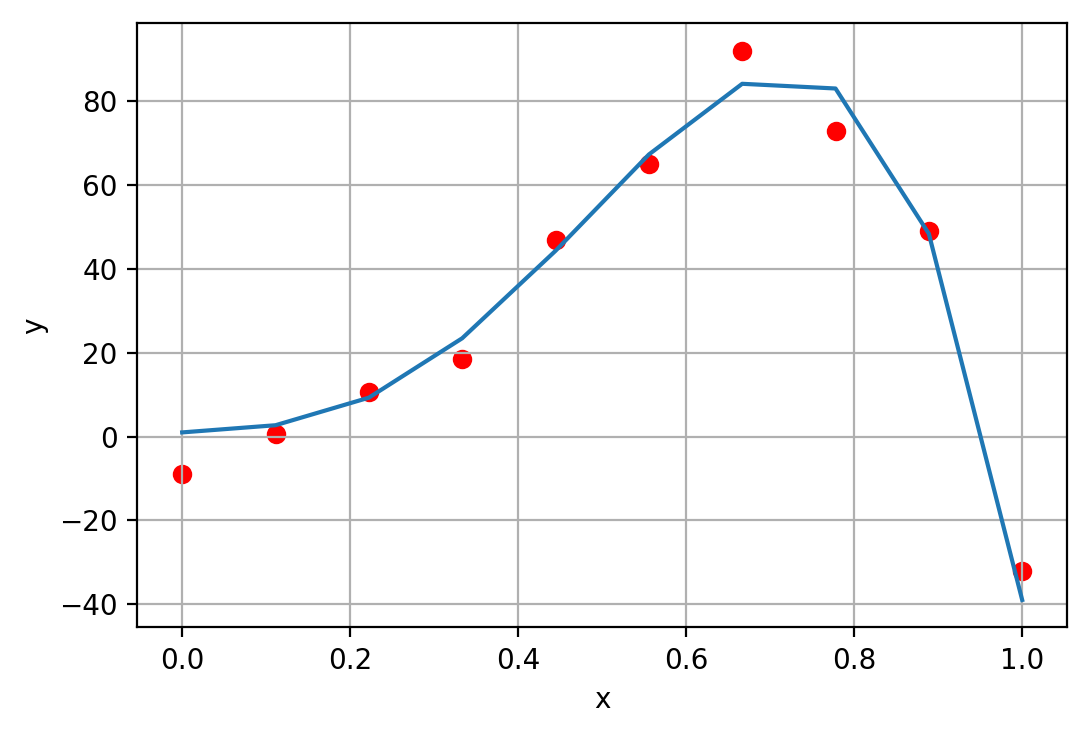

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# ----- make nice figures -----
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
# -----------------------------


x = np.linspace(0, 1, 10)
y = 1 + 10*x - 50*x**2 +1000*x**3 - 1000*x**4
W = np.random.normal(0, 10, len(y))
y_obs = y + W


plt.scatter(x, y_obs, color='r')
plt.plot(x, y)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [35]:
# Lets try to fit a degree 9 polynomial

Phi = np.vander(x, 11, increasing=True)

# Print out rank for our information
rank = np.linalg.matrix_rank(Phi)
num_cols = Phi.shape[1]
print("Phi has rank = " + str(rank))
print("n = " + str(num_cols))

# Get least squares solution
theta_ls = np.linalg.lstsq(Phi, y_obs, rcond=None)[0]


Phi has rank = 10
n = 11


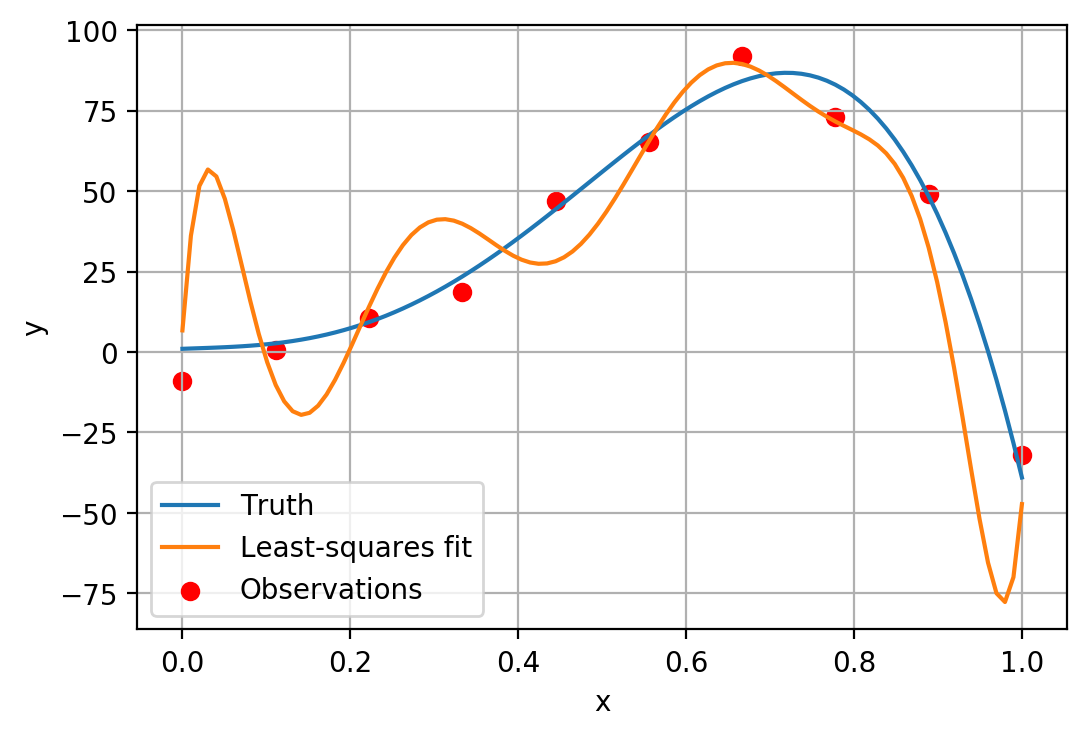

In [50]:
# make a more refined plot of the model
x_plot = np.linspace(0, 1, 100)
Phi_plot = np.vander(x_plot, 11, increasing=True)
# @ is matrix multiplication
y_model = Phi_plot @ theta_ls
y_plot = 1 + 10*x_plot - 50*x_plot**2 +1000*x_plot**3 - 1000*x_plot**4


plt.plot(x_plot, y_plot)
plt.plot(x_plot, y_model)
plt.scatter(x, y_obs, color='red')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Truth', 'Least-squares fit', 'Observations'])

We see from the above that this is an overfit. A typical outcome of overfitting is that the coefficients are take on unrealistic values.


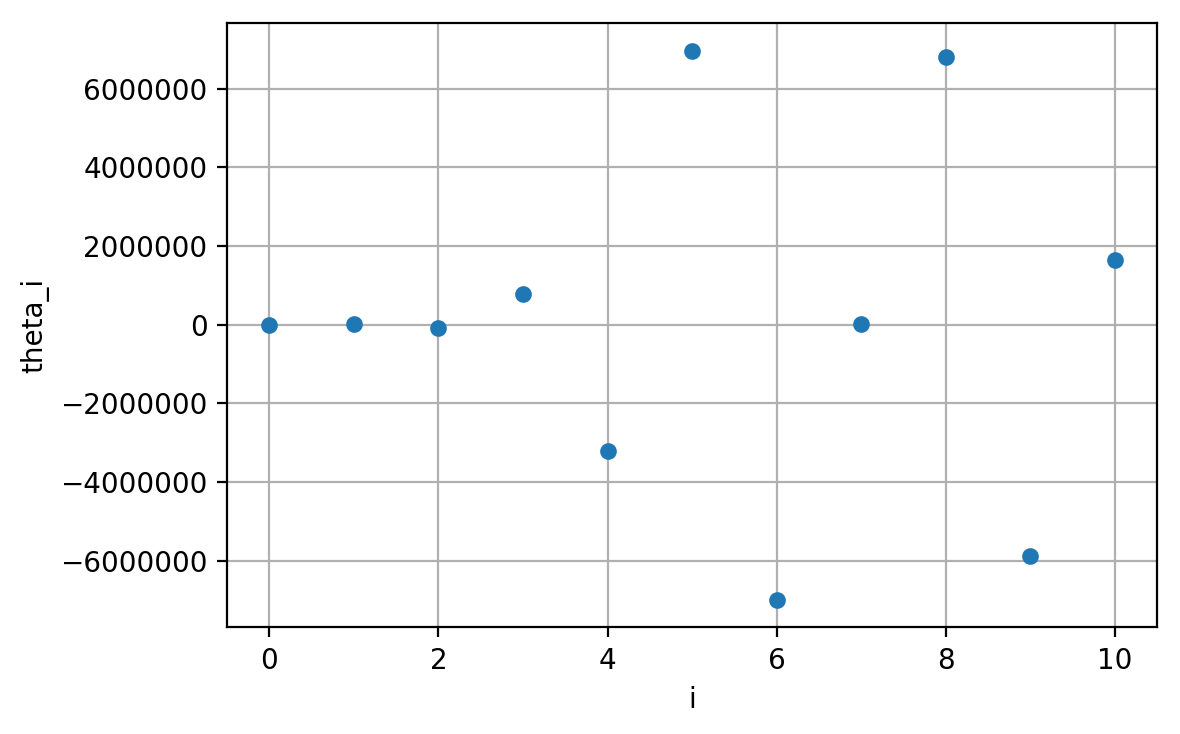

In [52]:
# What theta values do we get?
plt.plot(theta_ls, linewidth=0, marker='o', markersize=5)
plt.xlabel('i')
plt.ylabel('theta_i')
plt.grid()

We would like to control or penalize large values of theta to avoid this type of behavior. So instead of minimizing least squares loss, we'll introduce a penalty term for large coefficient values:

$$\large L_\text{Ridge}(\vec \theta) = \| \vec y - \Phi \vec \theta \|_2 ^2 + \lambda \| \vec \theta\|_2^2 $$

We'll use the library: `sklearn.linear_model.Ridge` for now. 

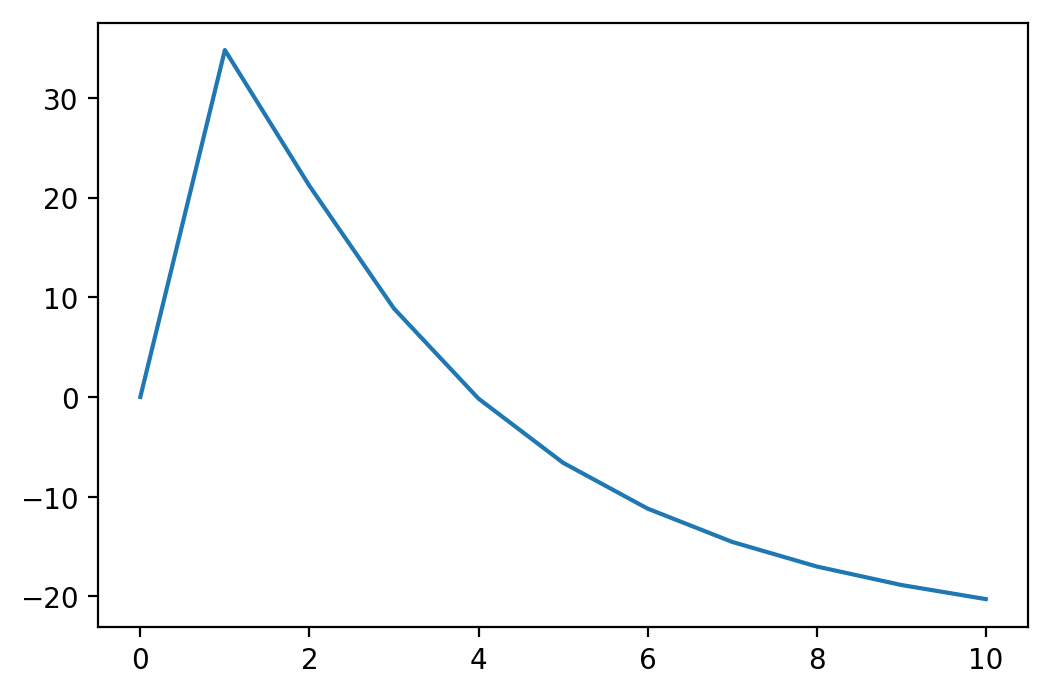

In [61]:
from sklearn.linear_model import Ridge

# We'll do this in three steps. First we set up the model, then we fit it. Then we get the coefficients

# 1. set up model. Here alpha is what we've been calling lambda above
ridge_model = Ridge(alpha = 1.0)

# 2. Fit the model
ridge_model.fit(Phi, y_obs)

# 3. Get coefficients
theta_ridge = ridge_model.coef_

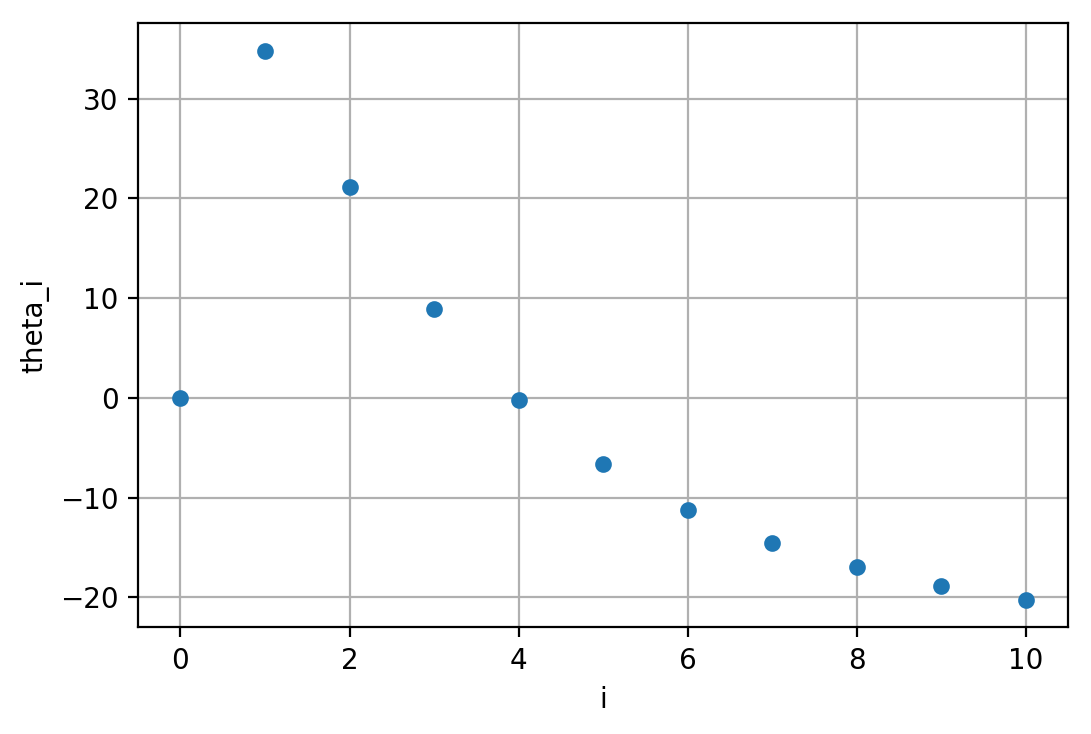

In [62]:
plt.plot(theta_ridge, linewidth=0, marker='o', markersize=5)
plt.xlabel('i')
plt.ylabel('theta_i')
plt.grid()

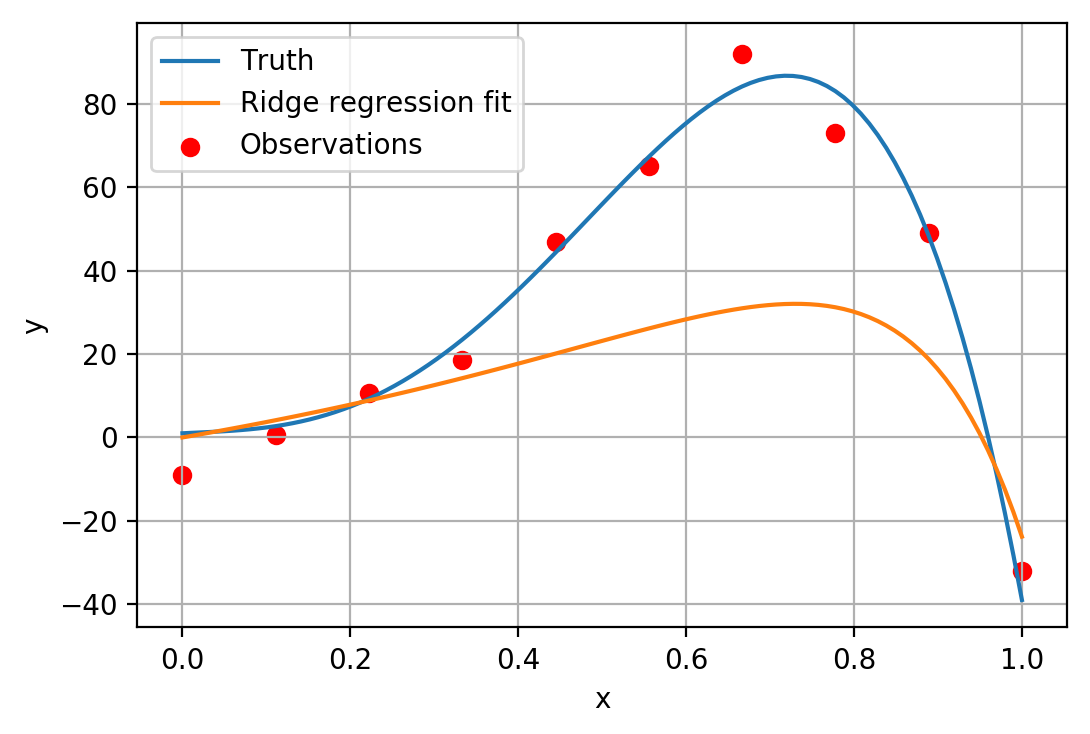

In [60]:
y_model = Phi_plot @ theta_ridge
plt.plot(x_plot, y_plot)
plt.plot(x_plot, y_model)
plt.scatter(x, y_obs, color='red')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Truth', 'Ridge regression fit', 'Observations'])

/Users/kreyes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


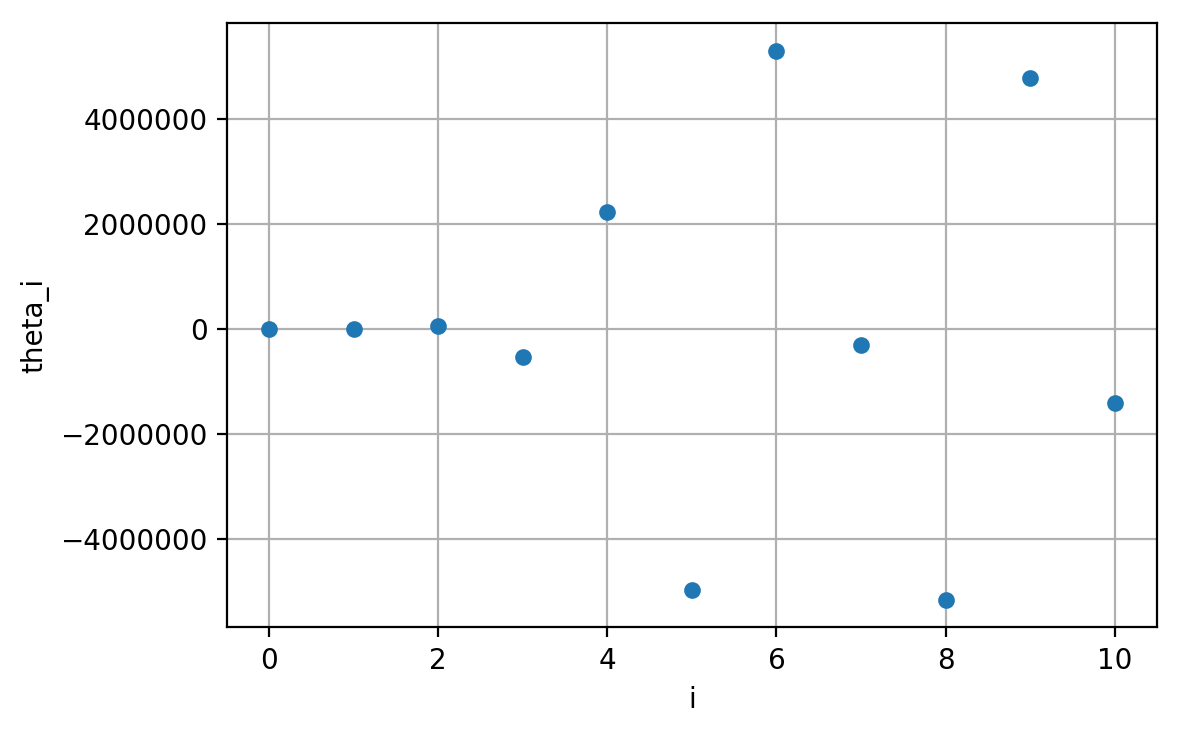

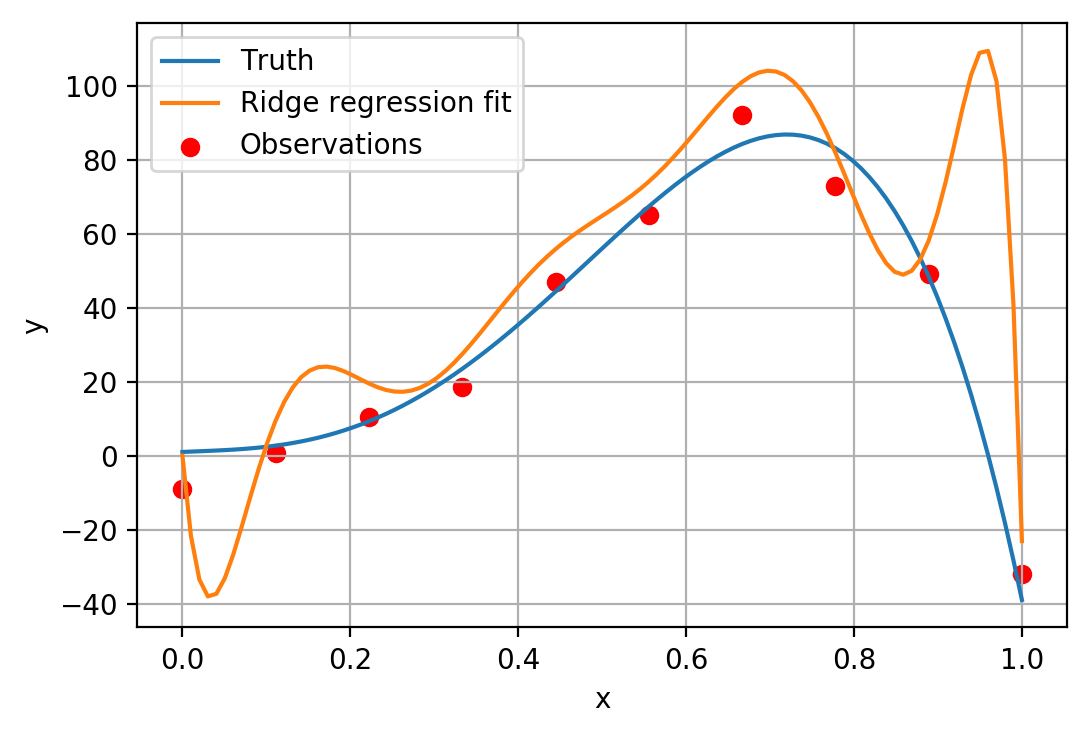

In [78]:
# Let's try lowering penality.
ridge_model = Ridge(alpha = 0)
ridge_model.fit(Phi, y_obs)
theta_ridge = ridge_model.coef_

# plot theta
plt.plot(theta_ridge, linewidth=0, marker='o', markersize=5)
plt.xlabel('i')
plt.ylabel('theta_i')
plt.grid()

# plot model
y_model = Phi_plot @ theta_ridge
plt.figure()
plt.plot(x_plot, y_plot)
plt.plot(x_plot, y_model)
plt.scatter(x, y_obs, color='red')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Truth', 'Ridge regression fit', 'Observations'])

## Normalization



In [118]:
# Z-normalization
mu_y = np.mean(y_obs)
sig_y = np.std(y_obs)
y_norm = (y_obs - mu_y)/sig_y

mu_Phi = np.mean(Phi)
sig_Phi = np.std(Phi)
Phi_norm = (Phi - mu_Phi)/sig_Phi

# Fit intercept set to false here since we've normalized our data
ridge_model = Ridge(alpha = 0.01, fit_intercept=False)
ridge_model.fit(Phi_norm, y_norm)
theta_ridge = ridge_model.coef_

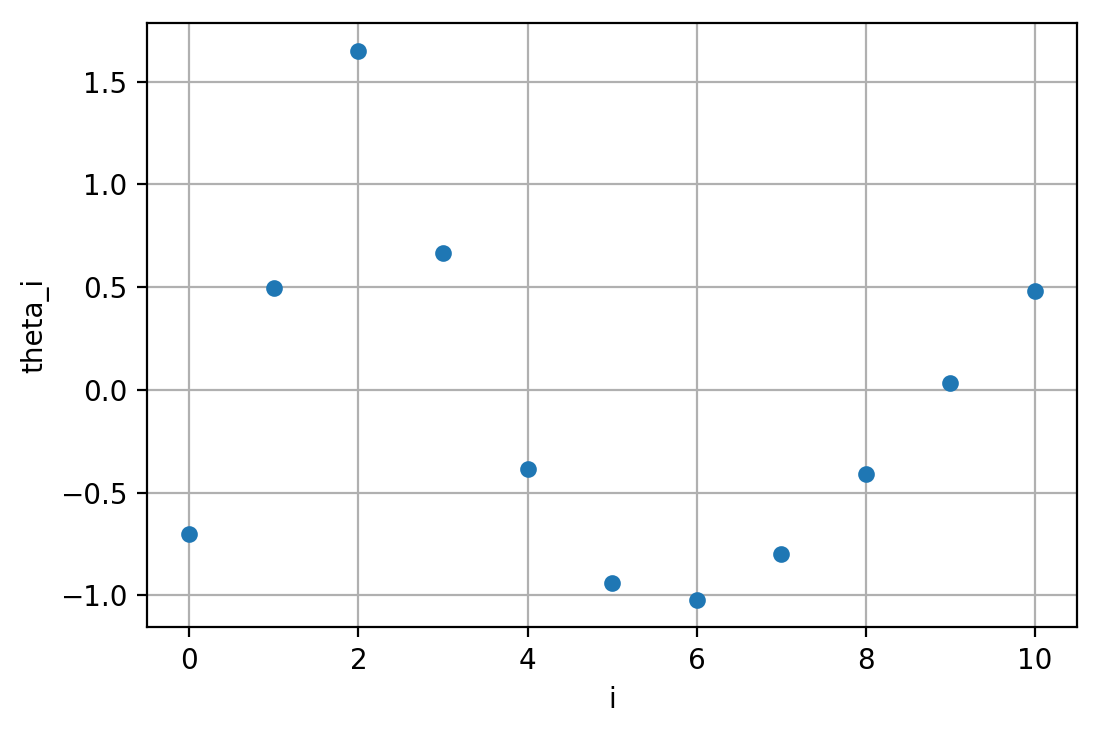

In [119]:
# plot theta
plt.plot(theta_ridge, linewidth=0, marker='o', markersize=5)
plt.xlabel('i')
plt.ylabel('theta_i')
plt.grid()

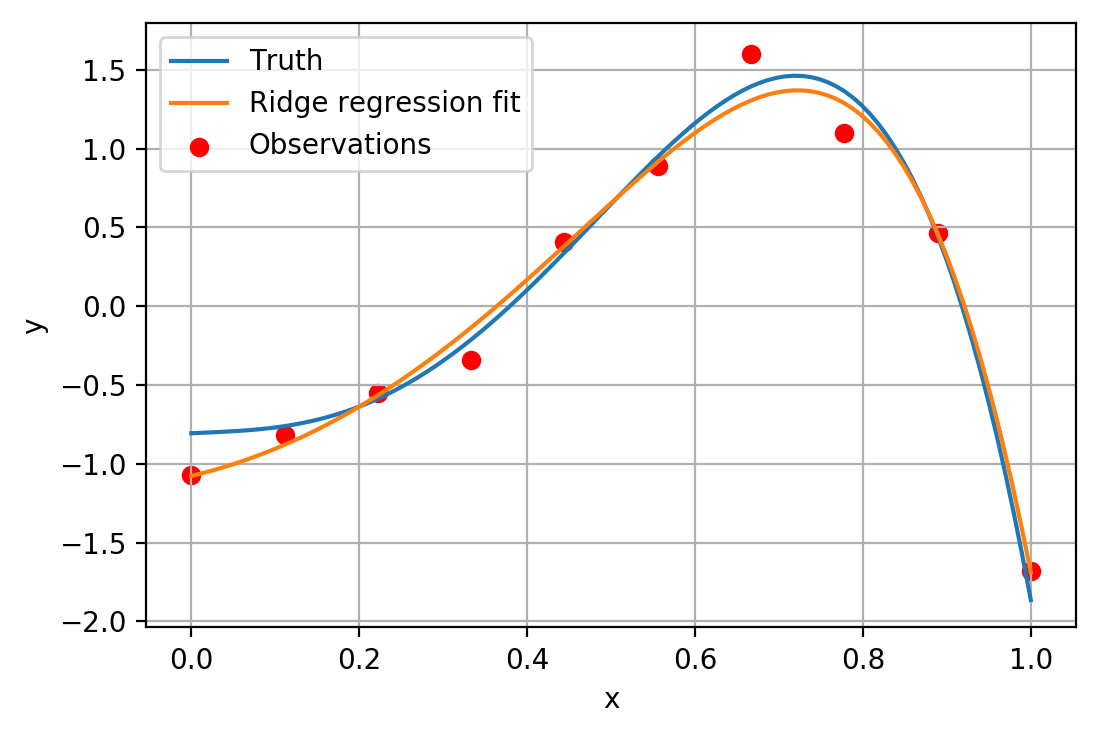

In [120]:
# Apply same transformation to Phi_plot
Phi_plot_norm = (Phi_plot - mu_Phi) / sig_Phi

# Apply same transformation to y_plot
y_plot_norm = (y_plot - mu_y)/sig_y


# plot model
y_model = Phi_plot_norm @ theta_ridge
plt.figure()
plt.plot(x_plot, y_plot_norm)
plt.plot(x_plot, y_model)
plt.scatter(x, y_norm, color='red')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Truth', 'Ridge regression fit', 'Observations'])

# Lasso


Lasso is very similar to Ridge, except that we penalize the 1-norm of the coefficients, which we've seen induces sparsity.



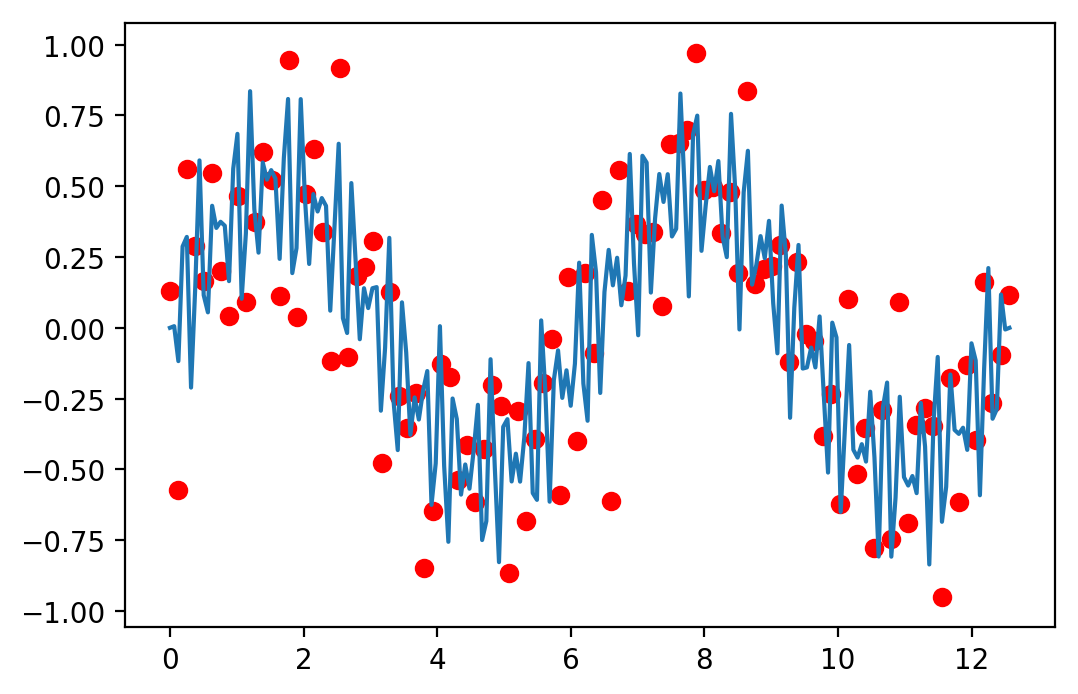

In [517]:
def f(x):
    return 0.5*np.sin(x) + 0.2*np.sin(33.0*x) + 0.2*np.sin(75.0*x)
    
x = np.linspace(0, 4*np.pi, 100)
y = f(x)
W = np.random.normal(0, 0.2, len(y))
y_obs = y + W


x_plot = np.linspace(0, 4*np.pi, 200)
y_plot = f(x_plot)

plt.plot(x_plot, y_plot)
plt.scatter(x, y_obs, color='red')

In [518]:
def form_fourier_design_matrix(X, n):
    # phi_ij = sin(j*x_i) for j = 0, ..., n-1
    
    num_rows = X.shape[0]
    num_cols = n
    
    Phi = np.zeros([num_rows, num_cols])
    
    # iterate over data points
    for i, x in enumerate(X):
        
        # iterate over 1, 2, ..., n
        for j in range(n):
            
            Phi[i,j] = np.sin(j*x)
            
            
    return Phi
            


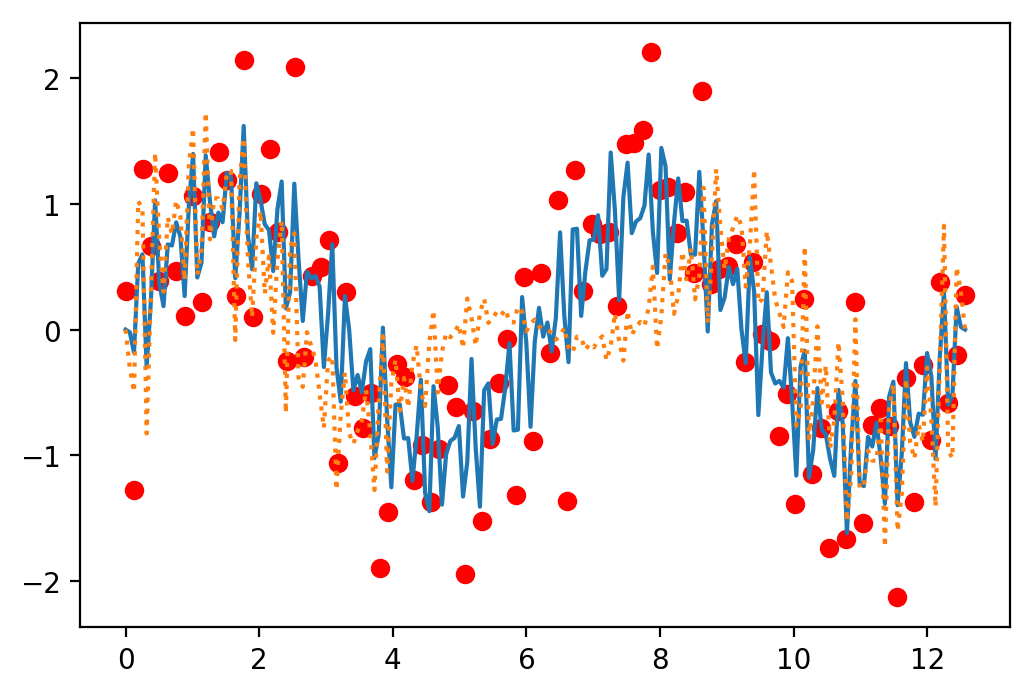

In [521]:
from sklearn.linear_model import Lasso

NUM_BASIS = 100
Phi = form_fourier_design_matrix(x, NUM_BASIS)

# normalize
mu_y = np.mean(y_obs)
sig_y = np.std(y_obs)
y_norm = (y_obs - mu_y)/sig_y

mu_Phi = np.mean(Phi)
sig_Phi = np.std(Phi)
Phi_norm = (Phi - mu_Phi)/sig_Phi

lasso_model = Lasso(alpha = 0.1, max_iter = 10000, fit_intercept=False)
#lasso_model = LassoCV(fit_intercept=False, positive=True)
lasso_model.fit(Phi_norm, y_norm)
theta_lasso =  lasso_model.coef_

# ridge regression solution for comparison
ridge_model = Ridge(alpha = 0.1, fit_intercept=False)
ridge_model.fit(Phi_norm, y_norm)
theta_ridge = ridge_model.coef_

# aply models
Phi_plot = form_fourier_design_matrix(x_plot, NUM_BASIS)
Phi_plot = (Phi_plot - mu_Phi)/sig_Phi
y_lasso = Phi_plot @ theta_lasso
y_ridge = Phi_plot @ theta_ridge

plt.plot(x_plot, y_lasso)
plt.plot(x_plot, y_ridge, ls=':')
plt.scatter(x, y_norm, color = 'red')

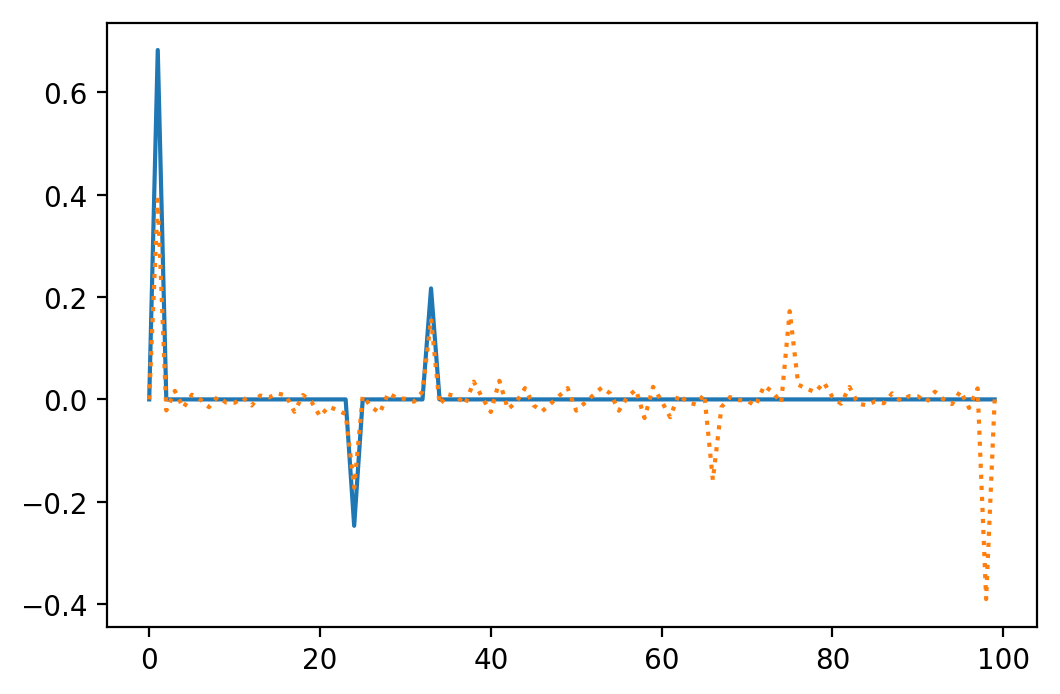

In [522]:
plt.plot(theta_lasso)
plt.plot(theta_ridge, ls=':')

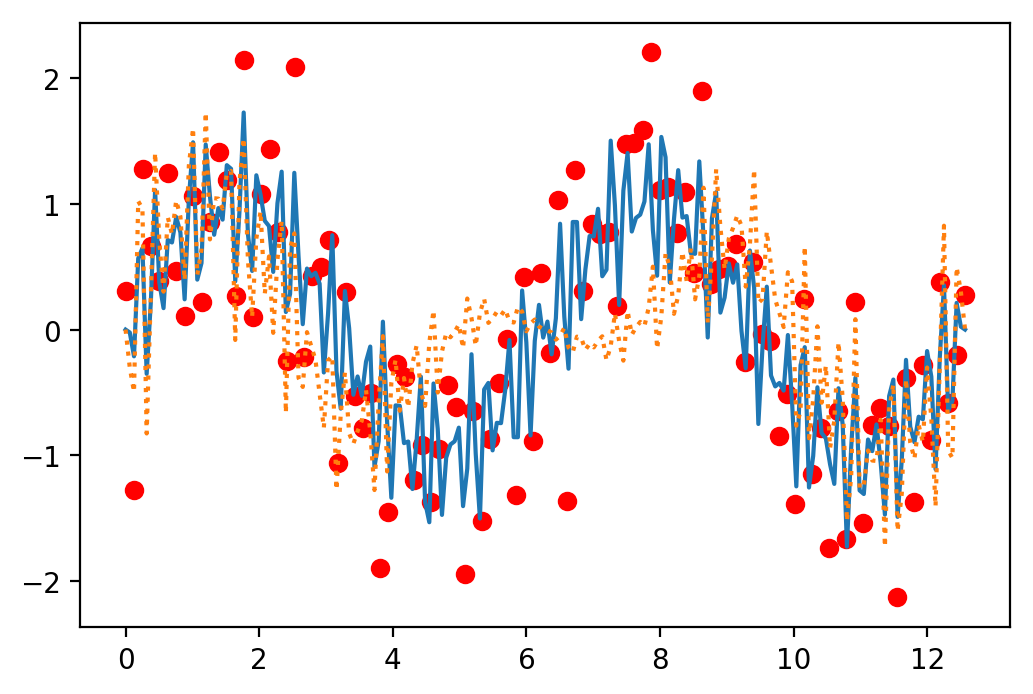

In [523]:
from sklearn.linear_model import LassoCV

lasso_model = LassoCV(fit_intercept=False)
lasso_model.fit(Phi_norm, y_norm)
theta_lasso =  lasso_model.coef_

y_lasso = Phi_plot @ theta_lasso

plt.plot(x_plot, y_lasso)
plt.plot(x_plot, y_ridge, ls=':')
plt.scatter(x, y_norm, color = 'red')

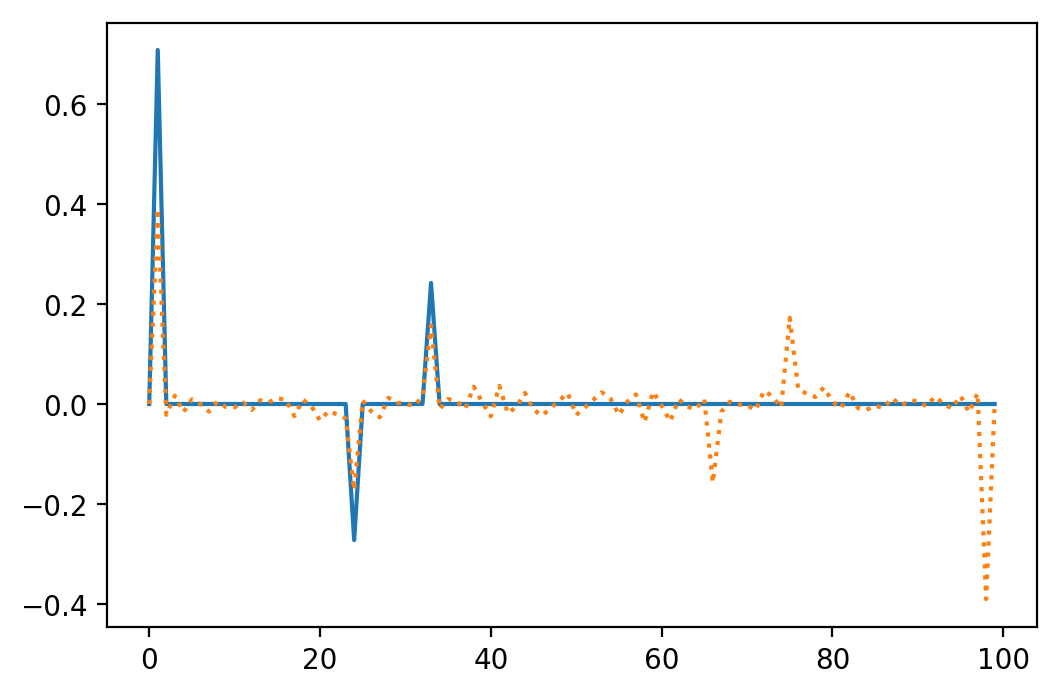

In [524]:
plt.plot(theta_lasso)
plt.plot(theta_ridge, ls=':')

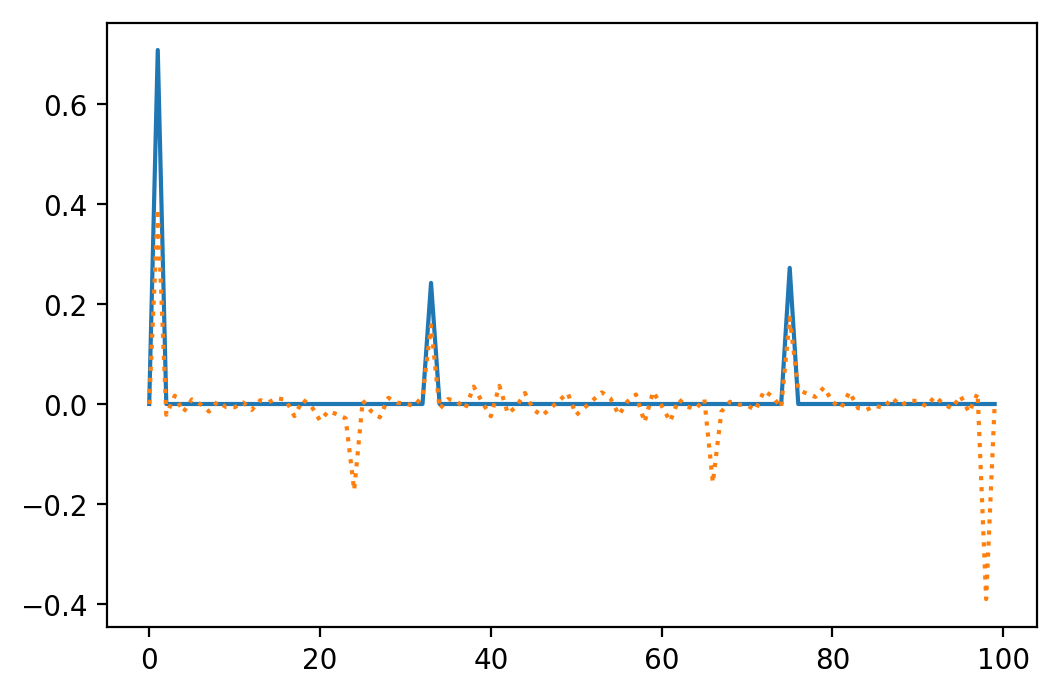

In [525]:
lasso_model = LassoCV(fit_intercept=False, positive = True)
lasso_model.fit(Phi_norm, y_norm)
theta_lasso =  lasso_model.coef_

Phi_plot = form_fourier_design_matrix(x_plot, NUM_BASIS)
Phi_plot = (Phi_plot - mu_Phi)/sig_Phi
y_lasso = Phi_plot @ theta_lasso
y_ridge = Phi_plot @ theta_ridge

plt.plot(theta_lasso)
plt.plot(theta_ridge, ls=':')

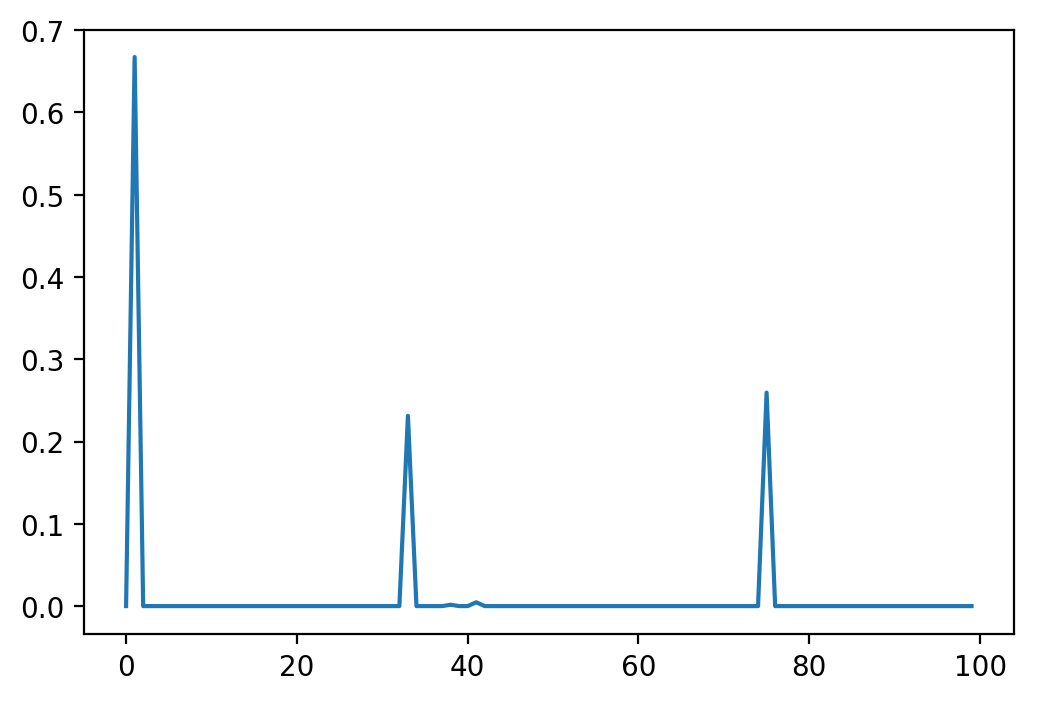

In [526]:
from sklearn.linear_model import ElasticNetCV

en_model = ElasticNetCV(fit_intercept=False, positive=True)
en_model.fit(Phi_norm, y_norm)
theta_en =  en_model.coef_

y_en = Phi_plot @ theta_en

plt.plot(theta_en)
